In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
fn = "/reg/data/ana01/temp/wilko/xswap/file_stats_20180129T145017.csv.xz"
d = pd.read_csv(fn)
# d.info()
d.frate /= pow(2,20)
d.fsize /= pow(2,30)

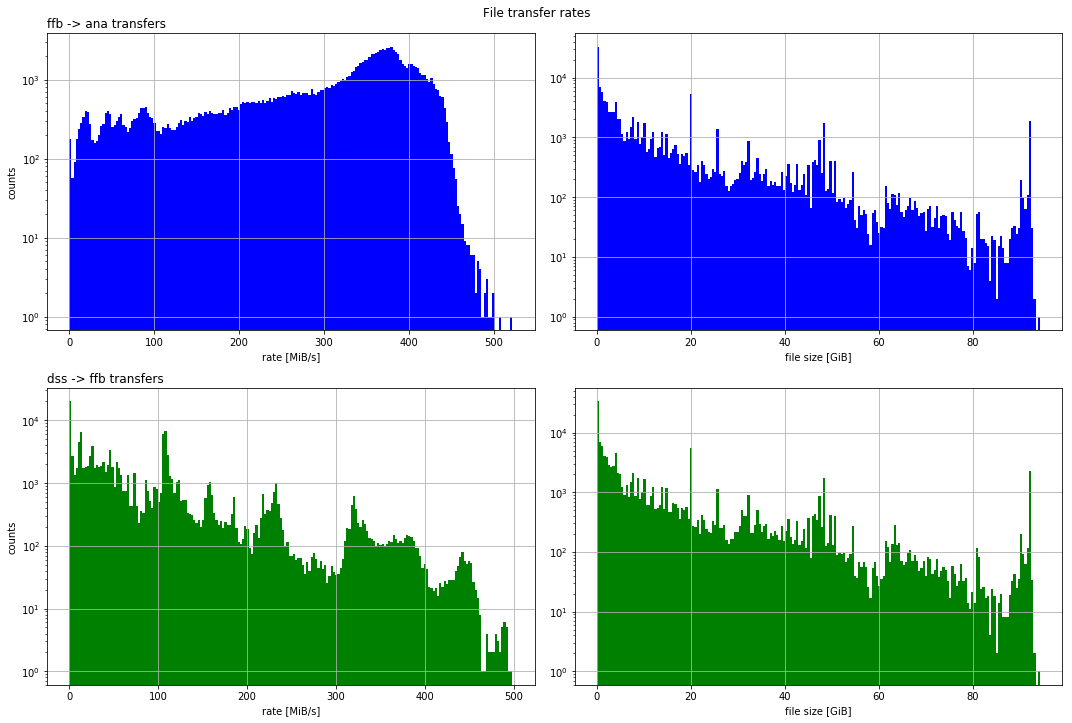

In [6]:

cut_ana = (d.fsize < 200) & (d.ffbtrans == 0)
cut_ffb = (d.fsize < 200) & (d.ffbtrans == 1)


fig = plt.figure(figsize=(15,10))

for n,cut in enumerate((cut_ana, cut_ffb)):    
    ax = fig.add_subplot(2,2,2*n+1)
    if n == 0:
        col='b'
        ax.set_title("ffb -> ana transfers", loc='left')
    else:
        col='g'
        ax.set_title("dss -> ffb transfers", loc='left')
    
    d.loc[ cut ].frate.hist(bins=200, color=col)
    plt.xlabel("rate [MiB/s]")
    plt.ylabel("counts")
    ax.set_yscale("log")

    ax = fig.add_subplot(2,2,2*n+2)
    d.loc[ cut ].fsize.hist(bins=200, color=col)
    plt.xlabel("file size [GiB]")
    ax.set_yscale("log")

plt.suptitle("File transfer rates", y=1)
plt.tight_layout()
plt.show()